# Ví dụ 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

In [3]:
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

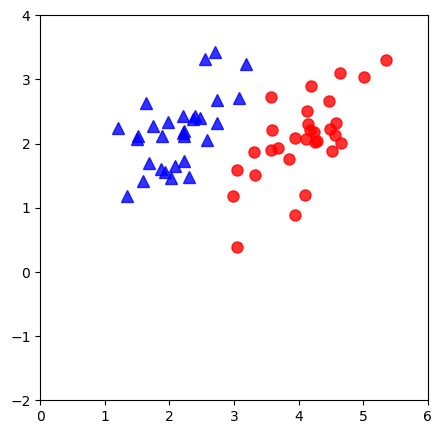

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [5]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [6]:
#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

In [7]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [8]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]


In [9]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


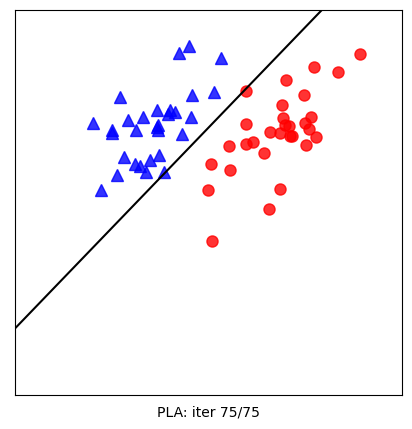

In [10]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 = i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill =False)
            ax.add_artist(circle)
        
        # hide axis
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        
        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax
    
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('C:/Users/Admin/Dev1ce/Desktop/ds/Machine Learning/Tuần 6/pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()

viz_alg_1d_2(w)

# Ví dụ 2:

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
main_df = pd.read_csv("sonar.all-data.csv", header=None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


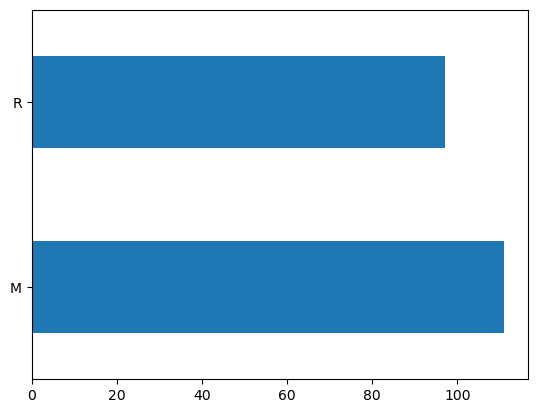

In [13]:
main_df[60].value_counts().plot(kind='barh') 
y_df = main_df[60] 
targes_label = {'M': 1,'R': -1} 
targes_df = [targes_label[item] for item in y_df] 
print(targes_df)

In [14]:
inputs_df = main_df.drop(60, axis=1)

In [15]:
inputs_df = main_df.drop(60, axis=1) 
x0 = np.ones(( inputs_df.shape[0], 1)) 
X = np.concatenate((x0, inputs_df), axis = 1)

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30, random_state=42)

In [17]:
X_train = np.asarray(X_train)
print(X_train.shape)
X_test = np.asarray(X_test)
y_train = np.asarray([y_train])
print(y_train.shape)
y_test = np.asarray([y_test])
print(y_train)

(145, 61)
(1, 145)
[[ 1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1
  -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1
   1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1
  -1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1
  -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1
   1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1
   1]]


In [18]:
def h(w, x):     
    return np.sign(np.dot(w.T, x)) 

In [19]:
def has_converged(X, y, w): 
    return np.array_equal(h(w, X), y) 

In [20]:
def perceptron(X, y, w_init): 
    w = [w_init] 
    N = X.shape[1] 
    mis_points = [] # set of miss position points 
    while True: 
        # mix data  
        mix_id = np.random.permutation(N) 
        for i in range(N): 
            xi = X[:, mix_id[i]].reshape(61, 1) 
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: 
                mis_points.append(mix_id[i]) 
                w_new = w[-1] + yi*xi  
 
                w.append(w_new) 
                 
        if has_converged(X, y, w[-1]): 
            break 
    return (w, mis_points)

In [21]:
d = X_train.shape[1] 
w_init = np.random.randn(d, 1) 
(w, m) = perceptron(X_train.T, y_train, w_init) 
print(w[-1]) 

[[ -41.57617529]
 [ 153.29640916]
 [ -51.38370734]
 [-155.37393949]
 [ 155.21711837]
 [  40.38955933]
 [  32.69205254]
 [ -68.93413254]
 [ -26.24303674]
 [  52.59681463]
 [ -55.38750625]
 [  87.35418852]
 [  13.38639845]
 [  -5.3077185 ]
 [ -10.33738017]
 [   9.56341299]
 [ -27.97897205]
 [ -33.7686226 ]
 [  45.09815804]
 [ -19.21362938]
 [  54.1485246 ]
 [ -78.07127584]
 [  77.22488286]
 [ -55.44684153]
 [  66.94691175]
 [  -7.89195399]
 [ -12.8534796 ]
 [  -0.22521858]
 [  17.29993153]
 [ -28.436515  ]
 [  73.36058562]
 [-104.52637958]
 [  32.59929485]
 [  43.16769927]
 [ -51.41692605]
 [  38.4681262 ]
 [ -68.68134943]
 [  16.90933109]
 [ -11.27928954]
 [  54.22818446]
 [ -51.99948133]
 [  -9.74930996]
 [ -27.15218184]
 [  61.93964114]
 [  -2.58919403]
 [  -7.61875688]
 [  57.53585001]
 [ -47.82234132]
 [ 146.35601343]
 [ 153.48844789]
 [-213.48626139]
 [  99.62636461]
 [  69.60536874]
 [  24.70873457]
 [ 122.10926935]
 [  -7.52601891]
 [ -66.89732329]
 [ -92.24981301]
 [  49.5054223

In [22]:
y_pred1 = h(w[-1], X_test.T)
print(y_pred1)
print(y_test)

[[ 1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
   1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.
   1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.
   1.  1.  1.  1. -1.  1.  1.  1. -1.]]
[[ 1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1
  -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1
  -1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1]]


In [23]:
y_pred2 = h(w[-1], X_train.T)

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [25]:
accuracy_score(y_train, y_pred2)

1.0

In [26]:
print(confusion_matrix(y_test[0], y_pred1[0]))

[[20  8]
 [ 6 29]]


In [27]:
a =accuracy_score(y_test[0], y_pred1[0])
r =recall_score(y_test[0], y_pred1[0])
p = precision_score(y_test[0], y_pred1[0])

print(a, r, p)

0.7777777777777778 0.8285714285714286 0.7837837837837838


In [28]:
from sklearn.linear_model import Perceptron

pct = Perceptron()
pct.fit(X_train, y_train.T)
y_pred_pct = pct.predict(X_test)

a =accuracy_score(y_test[0], y_pred_pct)
r =recall_score(y_test[0], y_pred_pct)
p = precision_score(y_test[0], y_pred_pct)

print(a, r, p)

0.8095238095238095 0.9714285714285714 0.7555555555555555


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# using Logistics model
y_train_Log = np.copy(y_train)
y_train_Log[y_train_Log != 1] = 0
y_test_Log = np.copy(y_test)
y_test_Log[y_test_Log != 1] = 0

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train_Log[0])
y_pred_log = log.predict(X_test)

a =accuracy_score(y_test_Log[0], y_pred_log)
r = recall_score(y_test_Log[0], y_pred_log)
p = precision_score(y_test_Log[0], y_pred_log)

print(a, r, p)

0.8095238095238095 0.8571428571428571 0.8108108108108109


In [30]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X)
print(X_pca)

[[ 0.57609252  0.31939293]
 [-0.97066736  1.01803924]
 [-0.32588679  0.87420857]
 [ 0.85203524  0.69086254]
 [-0.06475555  0.22296778]
 [-0.60831687  0.89889651]
 [-0.15748388  0.3956682 ]
 [-0.60629026 -0.04728686]
 [-0.38337485 -0.07355382]
 [-0.18357837 -1.01167568]
 [ 1.11602228 -0.46576795]
 [-0.108916   -0.26262607]
 [-0.94112886  0.22913852]
 [ 0.42328054  0.05314014]
 [ 0.05161197  0.19279682]
 [ 0.49269402  0.48094144]
 [ 0.95623538  0.40336282]
 [-0.26928702  0.92104629]
 [ 0.48709984 -0.21210984]
 [-1.34875184  0.64443495]
 [ 0.23274053  0.84521791]
 [ 1.066519    1.36442652]
 [ 1.59264318  1.19625472]
 [ 0.83664188 -0.09673199]
 [ 1.27249809  0.62683866]
 [ 1.11710742 -0.54115016]
 [-0.91468387  0.13531135]
 [-0.33984719 -0.43756423]
 [-0.67295834  0.5627403 ]
 [-0.33861531 -0.09315398]
 [-0.0897232  -0.42472012]
 [-0.29372891 -0.26954265]
 [-0.12658623  0.49437376]
 [-0.1272759   0.28660898]
 [-0.23467347  0.36520863]
 [-0.15399029 -0.28688976]
 [ 0.669559   -0.19543567]
 

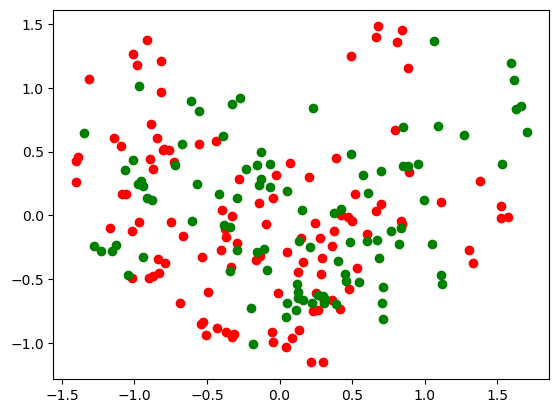

In [31]:
import matplotlib.pyplot as plt
class1 = []
class2 = []
for index in range(len(targes_df)):
    if targes_df[index] == 1:
        class1.append(X_pca[index])
    else:
        class2.append(X_pca[index])
    
class1 = np.asarray(class1)
x1 = []
x2 =[]
x3 = []
x4 = []

for i in class1:
    x1.append(i[0])
    x2.append(i[1])
    
for i in class2:
    x3.append(i[0])
    x4.append(i[1])

class2 = np.asarray(class2)
plt.scatter(x1, x2, c='red')
plt.scatter(x3, x4, c='green')
plt.show()

# Ví dụ 3:

In [32]:
from sklearn import datasets
import numpy as np

cancer_data = datasets.load_breast_cancer()

# print(cancer_data.data[5]) 
 
# print(cancer_data.data.shape) 
# #target set 
# print(cancer_data.target) 
 
from sklearn.model_selection import train_test_split 
  
cancer_data = datasets.load_breast_cancer() 
  
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,  
     cancer_data.target,  
     test_size=0.3,random_state=109)

In [33]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray([y_train])
y_test = np.asarray([y_test])

print(X_train.shape, y_train.shape)

(398, 30) (1, 398)


In [34]:
def h(w, x):     
    return np.sign(np.dot(w.T, x)) 

In [35]:
def has_converged(X, y, w): 
    return np.array_equal(h(w, X), y) 

In [36]:
def perceptron(X, y, w_init): 
    w = [w_init] 
    N = X.shape[0] 
    mis_points = [] # set of miss position points 
    while True: 
        # mix data  
        mix_id = np.random.permutation(N) 
        for i in range(N): 
            xi = X[:, mix_id[i]].reshape(30, 1) 
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: 
                mis_points.append(mix_id[i]) 
                w_new = w[-1] + yi*xi  
 
                w.append(w_new) 
                 
        if has_converged(X, y, w[-1]): 
            break 
    return (w, mis_points)

# Ví dụ 4:

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, precision_score, accuracy_score

np.random.seed(2)

In [43]:
# load data
data = pd.read_csv("C:/Users/Admin/Dev1ce/Desktop/ds/Machine Learning/Tuần 3/framingham.csv")
data.head()
data.isnull().sum()
data = data.dropna(how ='any', axis=0)
data.describe()

x1 = np.asarray([data['male']])
x2 = np.asarray([data['age']])
x3 = np.asarray([data['education']])
x4 = np.asarray([data['currentSmoker']])
x5 = np.asarray([data['cigsPerDay']])
x6 = np.asarray([data['BPMeds']])
x7 = np.asarray([data['prevalentStroke']])
x8 = np.asarray([data['prevalentHyp']])
x9 = np.asarray([data['diabetes']])
x10 = np.asarray([data['totChol']])
x11 = np.asarray([data['sysBP']])
x12 = np.asarray([data['diaBP']])
x13 = np.asarray([data['BMI']])
x14 = np.asarray([data['heartRate']])
x15 = np.asarray([data['glucose']])

y = np.asarray(data['TenYearCHD'])
print(y)


[0 0 0 ... 1 0 0]


In [44]:
# devide data into 2 part, tran_set: test_set = 7: 3
size = x1.shape[1]

x1_train = []
x2_train = []
x3_train = []
x4_train = []
x5_train = []
x6_train = []
x7_train = []
x8_train = []
x9_train = []
x10_train = []
x11_train = []
x12_train = []
x13_train = []
x14_train = []
x15_train = []
y_train = []
for i in range(int(np.round(size/100 * 70))):
    x1_train.append([x1[0][i]])
    x2_train.append([x2[0][i]])
    x3_train.append([x3[0][i]])
    x4_train.append([x4[0][i]])
    x5_train.append([x5[0][i]])
    x6_train.append([x6[0][i]])
    x7_train.append([x7[0][i]])
    x8_train.append([x8[0][i]])
    x9_train.append([x9[0][i]])
    x10_train.append([x10[0][i]])
    x11_train.append([x11[0][i]])
    x12_train.append([x12[0][i]])
    x13_train.append([x13[0][i]])
    x14_train.append([x14[0][i]])
    x15_train.append([x15[0][i]])
    y_train.append(y[i])

y_train = np.asarray(y_train)
X_train = np.concatenate((x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train, x10_train, x11_train, x12_train, x13_train, x14_train, x15_train), axis=1)
print(y_train)
print(len(X_train))



[0 0 0 ... 0 1 0]
2559


In [45]:
x1_test = []
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []
x8_test = []
x9_test = []
x10_test = []
x11_test = []
x12_test = []
x13_test = []
x14_test = []
x15_test = []
y_test = []


for i in range(int(np.round(size/100 * 70)), size):
    x1_test.append([x1[0][i]])
    x2_test.append([x2[0][i]])
    x3_test.append([x3[0][i]])
    x4_test.append([x4[0][i]])
    x5_test.append([x5[0][i]])
    x6_test.append([x6[0][i]])
    x7_test.append([x7[0][i]])
    x8_test.append([x8[0][i]])
    x9_test.append([x9[0][i]])
    x10_test.append([x10[0][i]])
    x11_test.append([x11[0][i]])
    x12_test.append([x12[0][i]])
    x13_test.append([x13[0][i]])
    x14_test.append([x14[0][i]])
    x15_test.append([x15[0][i]])
    y_test.append(y[i])

X_test = np.concatenate((x1_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test, x9_test, x10_test, x11_test, x12_test, x13_test, x14_test, x15_test), axis=1)
print(X_test)
print(len(X_test))


[[  0.    45.     2.   ...  23.46  85.    90.  ]
 [  0.    48.     4.   ...  25.5   85.    79.  ]
 [  1.    50.     1.   ...  28.26  68.    94.  ]
 ...
 [  1.    50.     1.   ...  25.97  66.    86.  ]
 [  1.    51.     3.   ...  19.71  65.    68.  ]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]
1097


In [46]:
# Xbar
one_col_train = np.ones((X_train.shape[0], 1))
Xbar_train = np.concatenate((one_col_train, X_train), axis=1)
print(Xbar_train)

[[  1.     1.    39.   ...  26.97  80.    77.  ]
 [  1.     0.    46.   ...  28.73  95.    76.  ]
 [  1.     1.    48.   ...  25.34  75.    70.  ]
 ...
 [  1.     1.    36.   ...  25.23  75.    63.  ]
 [  1.     1.    50.   ...  29.38  79.   106.  ]
 [  1.     1.    42.   ...  28.09  70.    70.  ]]


In [47]:
one_col_test = np.ones((X_test.shape[0], 1))
Xbar_test = np.concatenate((one_col_test, X_test), axis= 1)
print(Xbar_test)

[[  1.     0.    45.   ...  23.46  85.    90.  ]
 [  1.     0.    48.   ...  25.5   85.    79.  ]
 [  1.     1.    50.   ...  28.26  68.    94.  ]
 ...
 [  1.     1.    50.   ...  25.97  66.    86.  ]
 [  1.     1.    51.   ...  19.71  65.    68.  ]
 [  1.     0.    52.   ...  21.47  80.   107.  ]]


In [48]:
print(y)

[0 0 0 ... 1 0 0]


In [49]:
# Transer sample {-1,1} for Pct
y_train_pct = np.copy(y_train)
y_train_pct[y_train_pct != 1] = -1


y_test_pct = np.copy(y_test)
y_test_pct[y_test_pct != 1] = -1


In [50]:
print(X_test.shape)

(1097, 15)


In [51]:
# using Peceptron
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score

pct = Perceptron()
pct.fit(Xbar_train, y_train_pct)
y_pred_pct = pct.predict(Xbar_test)
print(y_pred_pct)

a = accuracy_score(y_test_pct, y_pred_pct)
p = precision_score(y_test_pct, y_pred_pct)
r = recall_score(y_test_pct, y_pred_pct)

print(a, p, r)


[-1 -1  1 ...  1  1 -1]
0.6654512306289881 0.2416452442159383 0.5662650602409639


In [52]:
# using Logistics
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(Xbar_train, y_train)
y_pred_log = log.predict(Xbar_test)
print(y_pred_log)

a = accuracy_score(y_test, y_pred_log)
p = precision_score(y_test, y_pred_log)
r = recall_score(y_test, y_pred_log)

print(a, p, r)

[0 0 0 ... 0 0 0]
0.8505013673655424 0.6 0.03614457831325301


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
